# Ejemplo de propagacion hacia adelante (forward propagation) desde dos puntos de vista: Granulado (a mano, componente-por-componente) y vectorial (matricial). XOR

Recuerde la tabla logica del XOR.

| $x_1$ | $x_2 $ | $x_1 \text{or} x_2 $ | 
|: :|: :|: :|
1 | 1 | 0 |
1 | 0 | 1 | 
0 | 1 | 1 | 
0 | 0 | 0

Una vez calculadad la hipotesis $h(\Theta, X)$ debemos usar un selector binario. El threshold (umbral) es $t$ escojamos $t=0.5$.
Esto es:

\begin{eqnarray}
y= h_{binary}(\Theta, X) = \left \{
\begin{array}{cc}
1  & \text{ si } h(\Theta, X) \ge t \\
0 & \text{ si } h(\Theta, X) < t 
\end{array}
\right .
\end{eqnarray}

Recorderis: propagacion hacia adelante.
$$ Z^{(\ell +1)} = A^{(\ell)} \Theta^{(\ell)}$$
$$ A^{(1)} = X$$.
$$ A^{(\ell +1)} = S(Z^{(\ell +1)})$$.




La arquitectura de la red para resolver el XOR se presenta en la
siguiente grafica.

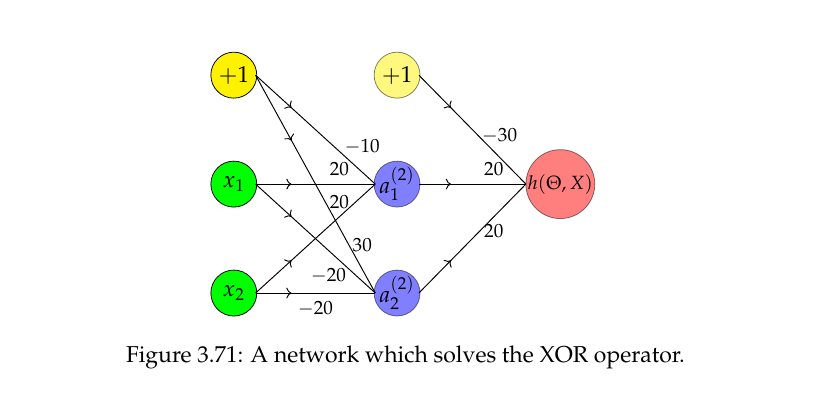

La notacion esta dada por la siguiente figura.

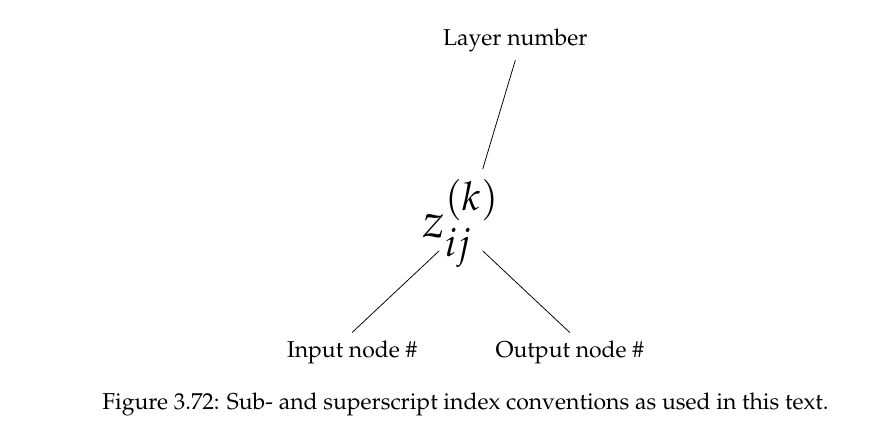

Empecemos:

$(x_1, x_2) = (1, 1)$:

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 30 \\
a_{11}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \exp(-30)} = 0.9999999999999065 \approx 1 \\
z_{12}^{(2)} &=&  30 - 20 x_1 - 20 x_2 = 30 -20-20 = -10 \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) = S(-10) = 4.5397868702434395e-05 \approx 0 
\end{eqnarray}

Para la ultima capa

$$ z_{11}^{(3)} = -30 + 20 (0.9999999999999065) + 20 ( 4.5397868702434395e-05) \approx -10  $$

$$ h(\Theta, X) =  S(z_{11}^{(3)}) = a_{11}^{(3)} = 4.543910487654583e-05 $$

Comom $h(\Theta, X) < 0.5$, $h_b(\Theta, (1,1)) = 0$.


In [ ]:
import numpy as np
def S(x):
    return 1/(1 + np.exp(-x))

S(30)
S(-10)

#S(-9.99909204262782)

4.5397868702434395e-05

In [ ]:
 -30 + 20 *(0.9999999999999065) + 20 *( 4.5397868702434395e-05)

-9.99909204262782

$(x_1, x_2) = (1, 0)$:

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 10 \\
a_{11}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \exp(-10)} = 0.999955 \approx 1 \\
z_{12}^{(2)} &=&  30 - 20 x_1 - 20 x_2 = 30 -20 = 10 \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) = S(-10) =  0.999955 \approx 1
\end{eqnarray}

Para la ultima capa

$$ z_{11}^{(3)} = -30 + 20 (0.9999999999999065) + 20  \approx 10  $$

$$ h(\Theta, X) =  S(z_{11}^{(3)}) = a_{11}^{(3)} = 0.9999999999999065 $$

Comom $h(\Theta, X) > 0.5$, $h_b(\Theta, (1,0)) = 1$.


$(x_1, x_2) = (0, 1)$:

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = 10 \\
a_{11}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \exp(-10)} = 0.999955 \approx 1 \\
z_{12}^{(2)} &=&  30 - 20 x_1 - 20 x_2 = 30 -20 = 10 \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) = S(-10) =  0.999955 \approx 1
\end{eqnarray}

Para la ultima capa

$$ z_{11}^{(3)} = -30 + 20 (0.9999999999999065) + 20  \approx 10  $$

$$ h(\Theta, X) =  S(z_{11}^{(3)}) = a_{11}^{(3)} = 0.9999999999999065 $$

Comom $h(\Theta, X) > 0.5$, $h_b(\Theta, (0,1)) = 1$.


$(x_1, x_2) = (0, 0)$:

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = -10 \\
a_{11}^{(2)} &=& S(z_{11}^{(2)}) = \frac{1}{1 + \exp(-10)} = 4.5397868702434395e-05 \approx 0 \\
z_{12}^{(2)} &=&  30 - 20 x_1 - 20 x_2 = 30  \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) = S(30) =  0.999955 \approx 1
\end{eqnarray}

Para la ultima capa

$$ z_{11}^{(3)} = -30 + 20 (0) + 20 (1)  \approx -10  $$

$$ h(\Theta, X) =  S(z_{11}^{(3)}) = a_{11}^{(3)} = 4.5397868702434395e-05 $$

Comom $h(\Theta, X) < 0.5$, $h_b(\Theta, (0,0)) = 0$.


## Enfoque vectorizado (matricial)


In [ ]:
def s(x):
    return 1/(1 + np.exp(-x))

X = np.array([ [1,1], [1,0], [0,1], [0,0]])
X

array([[1, 1],
       [1, 0],
       [0, 1],
       [0, 0]])

In [ ]:
n = len(X)
n

4

In [ ]:
# agregar columna de unos al comienzo de la matriz X. "bias"
ones = np.ones(shape=(n,1), dtype='float')
X = np.column_stack((ones, X))
X

array([[1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 0.]])

In [ ]:
X.shape

(4, 3)

In [ ]:
Theta1 = np.array( [ [-10,30], [20,-20], [20,-20]])
Theta1

array([[-10,  30],
       [ 20, -20],
       [ 20, -20]])

In [ ]:
Theta2 = np.array([ [-30], [20], [20] ])
Theta2

array([[-30],
       [ 20],
       [ 20]])

In [ ]:
# primera capa oculta
Z1 = X.dot(Theta1)
Z1

array([[ 30., -10.],
       [ 10.,  10.],
       [ 10.,  10.],
       [-10.,  30.]])

In [ ]:
A1 = s(Z1)
A1

array([[1.00000000e+00, 4.53978687e-05],
       [9.99954602e-01, 9.99954602e-01],
       [9.99954602e-01, 9.99954602e-01],
       [4.53978687e-05, 1.00000000e+00]])

In [ ]:
# Agregar el bias a A1
A1 = np.column_stack((ones, A1))
A1

array([[1.00000000e+00, 1.00000000e+00, 4.53978687e-05],
       [1.00000000e+00, 9.99954602e-01, 9.99954602e-01],
       [1.00000000e+00, 9.99954602e-01, 9.99954602e-01],
       [1.00000000e+00, 4.53978687e-05, 1.00000000e+00]])

In [ ]:
Z2 = A1.dot(Theta2)
Z2

array([[-9.99909204],
       [ 9.99818409],
       [ 9.99818409],
       [-9.99909204]])

In [ ]:
H = S(Z2)
H

array([[4.54391049e-05],
       [9.99954520e-01],
       [9.99954520e-01],
       [4.54391049e-05]])

In [ ]:
HB = (H >= 0.5)
HB

array([[False],
       [ True],
       [ True],
       [False]])

In [ ]:
# con 1 y 0s
list(map(int, HB))

[0, 1, 1, 0]

In [ ]:
from abc import ABCMeta
9:15 

## Proceso de aprendizaje. Encontrar los $\Theta$s

Volvemos al cuento de la funcion de costo y  el gradiente.

El proceso (como siempre en este curso).

1.  Formular una funcion de costo (objetivo). $J(\Theta)$
2. Hallar el gradiente de la funcion de costo $\nabla J_{\Theta}(\Theta)$. 
3. El metodo del descenso con gradiente se basa en:
Para la iteracion $p$
$$ \Theta^{(p)} \leftarrow  \Theta^{(p)} - \alpha \nabla_{\theta} J(\Theta, X) $$

Se hacen tantas iteraciones $p=1,2,3, \cdots, n$ hasta donde el error este dabajo de un threshold (umbral) o se agote el tiempo de espera en la maquina.

La funcion de costo es la misma logistica que ya vimos


$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)})] + (1 - y_i) \log (1 - h(\theta, x^{(i)})]  + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Vamos a agregar algo. Queremos usar un algoritmo de clasificacion multiclase donde $K >2$, en este caso vamos a ampliar la funcion de costo para sumar las contribuciones de todas las clases.

$$J(\theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log[ h_k(\theta, x^{(i)})] + (1 - y_i^{(k)}) \log (1 - h_k(\theta, x^{(i)})]  + \frac{\lambda}{2m} \sum_{\ell=1}^{L} \sum_{i=1}^{n_{\ell}} \sum_{j=1}^{n_{\ell +1}} (\Theta_{ij}^{(\ell)})^2$$



## Gradiente de la funcion de costo.

Antes de entender como hallar el gradiente, debemos entender que es $h(\Theta, X)$.  Recordemos la propagacion hacia adelante.


La siguiente secuencia nos lleva de los datos $X$, y el tensor (inicialmente aleatorio) hasta a $h(\Theta, X)$.

\begin{eqnarray}
A^{(1)} &=& X  \\
A^{(2)} &=& S(Z^{(2)}) = S(  A^{(1)} \Theta^{(1)}) \\
A^{(3)} &=& S(Z^{(3)}) = S(A^{(2)} \Theta^{(2)}) \\
&\vdots & \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S ( A^{(L-2)} \Theta^{(L-2)} ) \\
A^{(L)} &=& S(Z^{(L)}) = S(A^{(L-1)} \Theta^{(L-1)}) \\
h(\Theta, X) &=& A^{(L+1)} = S(Z^{(L+1)}) = S(A^{(L)} \Theta^{(L)})
\end{eqnarray}



Mire la ultima ecuacion, $ A^{(L)}$ es una matriz $m_L \times n_L$ y $\Theta^{(L)}$ es otra matriz de tamano $n_L \times p_L$, y el producto es
$m_L \times p_L$ y por lo tanto $h$ es suna matriz


$$ h_{ij}(\Theta, X) = S \left (  \sum_k A_{ik}^{(L)}  \Theta_{kj}^{(L)}\right ) = S_{ij} = A_{ij}^{(L+1)}$$



\begin{eqnarray}
  \frac{\partial J(\Theta, X) } {\partial \Theta^{(L)}_{pq} } &=& 
  -\frac{1}{m} \sum_i \sum_j y_{ij} \frac{~~S_{ij}~~(1-S_{ij})}{!!S_{ij}}}  
  \left  (  \sum_k A^{(L)}_{ik} \delta_{pk} \delta_{qj} \right ) \nonumber \\
  \quad \quad &+&   \frac{1}{m} \sum_i \sum_j (1-y_{ij}) 
  \frac{ S_{ij} \cancel{(1-S_{ij})}}{\cancel{1-S_{ij}}}
  \left  (  \sum_k A^{(L)}_{ik} \delta_{pk} \delta_{qj} \right ) \nonumber\\
  &=& \frac{1}{m} \sum_i -y_{iq} (1-S_{iq}) A_{ip}^{(L)}
  + (1- y_{iq}) S_{iq} A_{ip}^{(L)} \nonumber\\
  &=& \frac{1}{m} \sum_i (S_{iq}-y_{iq})A_{ip}^{(L)} \nonumber\\
  &=& \frac{1}{m} \sum_i (A_{iq}^{(L+1)}-y_{iq})A_{ip}^{(L)} \nonumber\\
  &=& \frac{1}{m} (A^{(L)})_p^T ( A^{(L+1)}- Y)_q \;,
\end{eqnarray}

where we omit the argument of the $S$ function  to avoid cluttering, and we write the result
in more compact (matrix) form. On the right side of the last expression, we have the inner
product of the $p$th column of $A^{(L)}$ with the $q$th column of
$A^{(L+1)}-Y$.  This is a vectorized form of the gradient with respect to the $\Theta^{(L)}$
weight, the weighting matrix that produces the final prediction. We can express this in
matrix form as 
\begin{eqnarray*}
  \left ( \frac{\partial J(\Theta, X) }{\partial \Theta^{(L)}} \right )_{pq} = 
  \frac{1}{m} \left ( (A^{(L)})^T ( A^{(L+1)}- Y ) \right )_{pq} .
\end{eqnarray*}

Now, we want to take the derivative with respect to the weighting matrix that generated the last hidden layer, $\Theta_{pq}^{(L-1)}$.
Here, we use the chain rule. We write
\begin{eqnarray}
  h_{ij}(\Theta,X) &=& S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right ) 
  =A_{ij}^{(L+1)} \\
  A_{ik}^{(L)} &=& S(Z_{ik}^{(L)}) = S \left (\sum_r A_{ir}^{(L-1)} \Theta_{rk}^{(L-1)} 
  \right ) \, . 
\end{eqnarray}
We take the derivative of the log functions. Because $A_{ir}^{(L-1)}$ and $\Theta_{kj}^{(L)}$ do not depend on $\Theta_{pq}^{(L-1)}$,
\begin{eqnarray*}
  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} &=& 
  \frac{1}{\cancel{S_{ij}}} \cancel{S_{ij}} (1-S_{ij}) 
  \sum_k 
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} 
  \\
  &=& (1 - A_{ij}^{(L+1)})   \sum_k  
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \;.
\end{eqnarray*}
We should find
$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}}$. That is, 
from calling $S=A^{(L)}$ and equatio ??
\begin{eqnarray*}
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}}
  = S_{ik}(1-S_{ik}) \sum_r  A_{ir}^{(L-1)} \delta_{rp} \delta_{kq}
  = A_{ik}^{(L)} (1 - A_{ik}^{(L)} ) A_{ip}^{(L-1)} \delta_{kq} \,,
\end{eqnarray*}
so,
\begin{eqnarray*}
  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} 
  &=& (1 - A_{ij}^{(L+1)}) \left (  
  A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)}
  \Theta_{qj}^{(L)} \right )  \;.
\end{eqnarray*}
Similarly, we find
\begin{eqnarray*}
  \frac{\partial (\log ( 1- h_{ij} (\Theta, X) ))}{\partial \Theta_{pq}^{(L-1)}} &=& 
  -\frac{1}{\cancel{1-S_{ij}}}{S_{ij}} \cancel{(1-S_{ij}}) 
  \sum_k 
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \\
  &=& - A_{ij}^{(L+1)}  \sum_k  
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
  &=& - A_{ij}^{(L+1)}  
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)} 
  \right ) \,.
\end{eqnarray*}
Then,
\begin{eqnarray*}
  && y_{ij}  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} 
  + (1-y_{ij}) 
  \frac{\partial \log [1-h_{ij} (\Theta, X) )]}{\partial \Theta_{pq}^{(L-1)}} =  \\
  && \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}  \right )
  [ y_{ij} (1- A_{ij}^{(L+1)})  - (1-y_{ij}) A_{ij}^{L+1}) ] \\
  &=& 
  (y_{ij} - A_{ij}^{(L+1)}) 
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}   \right )\,.
\end{eqnarray*}
Using equation~\ref{firstdJdt},
\begin{eqnarray*}
  \frac{\partial J(\Theta, X) } {\partial \Theta^{(L-1)}_{pq} } &=& 
  \frac{1}{m} \sum_i \sum_j 
  (A_{ij}^{(L+1)} - y_{ij})
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}  \right ) \\
  &=&
  \frac{1}{m} \sum_i 
  A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \sum_j
  (A_{ij}^{(L+1)} - y_{ij})
  \Theta_{qj}^{(L)}    \\
  &=&
  \frac{1}{m} \sum_i 
  A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  [(A^{(L+1)}-Y) (\Theta^{(L)})^T]_{iq}  \\
  &=& \frac{1}{m} \sum_i  A_{ip}^{(L-1)} 
  [(A^{(L+1)}-Y) (\Theta^{(L)})^T]_{iq} A_{iq}^{(L)} (1 - A_{iq}^{(L)} )  \\
  &=& \frac{1}{m} \sum_i  A_{ip}^{(L-1)} 
  [(A^{(L+1)}-Y) (\Theta^{(L)})^T]_{iq} [ A^{(L)} .*  (1 - A^{(L)} )]_{iq} \\
  &=& \frac1m [( A^{(L-1)})^T ]_p [ (A^{(L+1)}-Y) (\Theta^{(L)})^T   A^{(L)} .*  
  (1 - A^{(L)} ) ]_q \,,
\end{eqnarray*}
where ``$.*$'' is the Hadamard product, with the same notation as used in {\Oc}. \rm
In general, we can write
\begin{eqnarray}
  \frac{\partial J(\Theta, X) } {\partial \Theta^{(I)}_{pq} } = 
  \frac{1}{m} (A^{(I)})_p^T  \left [ [(A^{(I+2)}-Y) (\Theta^{(I+1)})^T]
\left ( A^{(I+1)} .*(1- A^{(I+1)} )  \right ) \right ]_q\,,
  \end{eqnarray}
  with $I=L-1,L-2, \cdots , 1$.  With this, we are ready to create an algorithm of backpropagation
  which we show in vectorized form. Initially, we perform forward propagation based on
  Algorithm and equations for forward propagation.  That is, we find the activations
  in all layers, starting with $A^{(1)}=X$, and hidden layers $A^{i}$ ($i=2, \cdots ,  L$), and  finally activation matrix $A^{(L+1)}=h(\Theta, X)$.  After completing the forward propagation
  through the network, we use equation~\ref{eq:dJdt} to begin and iteratively use
  equation above to adjust the weighting matrices.  In expression above,
  we embrace all terms with subindex $q$ along the same square bracket. We show the pseudocode
  in Algorithm shown next.  


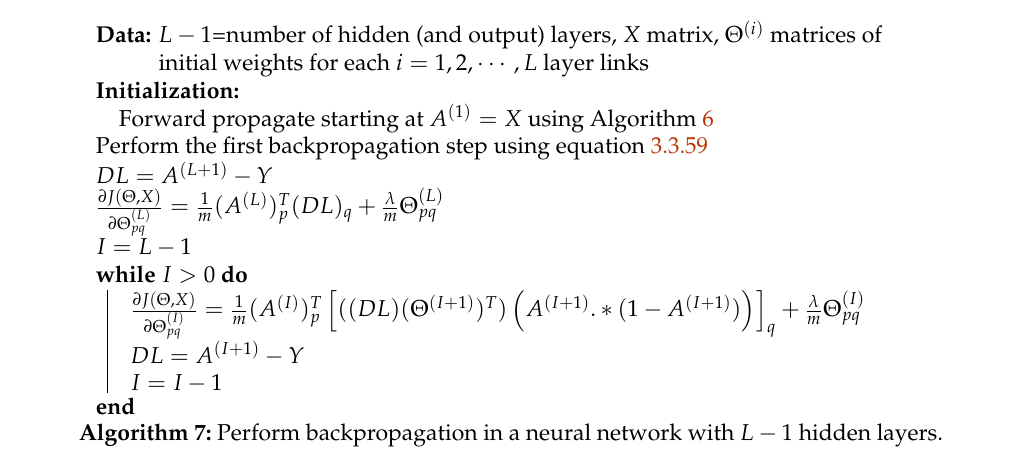